In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from IPython.display import display, HTML
import plotnine as pn

import taxes as ts

In [3]:
def show(df, max_height='400px'):
    html = df.to_html()
    styled_html = f'<div style="max-height:{max_height}; overflow:auto;">{html}</div>'
    display(HTML(styled_html))

In [4]:
data = ts.Data()

In [5]:
data.get_ranges()

,item,min,max
0,Cockatrice Eye,0,11
1,Dragon Head,0,7
2,Lich Skull,0,9
3,Unicorn Horn,0,15
4,Zombie Hand,0,29


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 37816, number of used features: 5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.817551
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[837]	valid_0's rmse: 1.19816


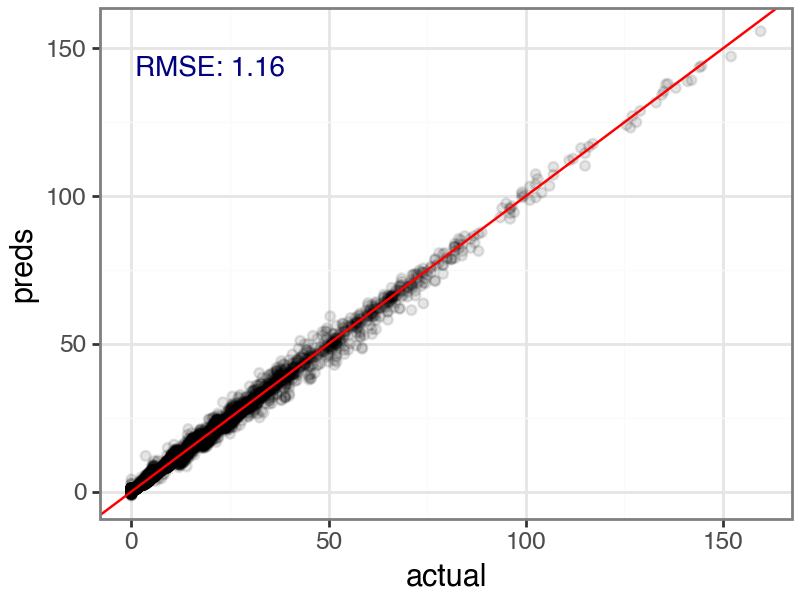

In [9]:
modeler = data.get_modeler()
modeler.train(30)
modeler.get_tstpreds_plot()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 37781, number of used features: 5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.798944
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[721]	valid_0's rmse: 1.06986


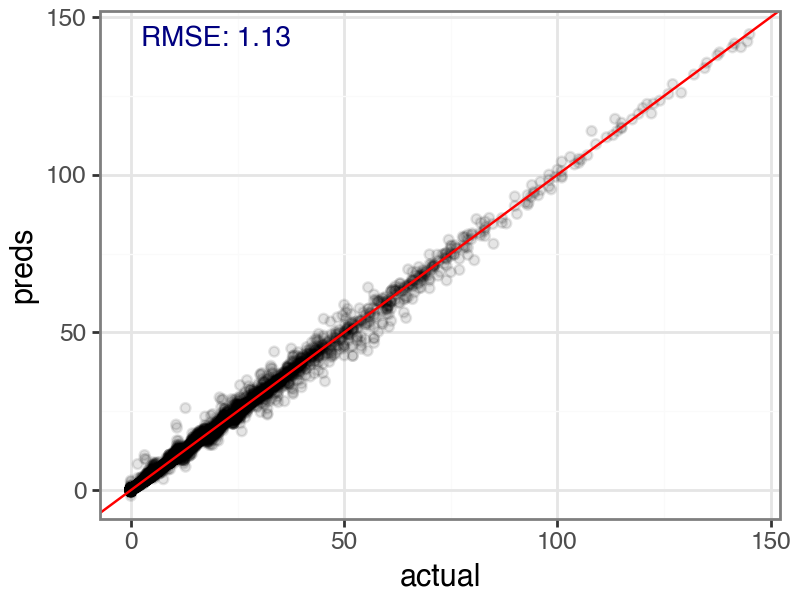

In [6]:
modeler = data.get_modeler()
modeler.train(60)
modeler.get_tstpreds_plot()

In [ ]:
# Is there a progressive tax? Regressive?
# Try: are taxes less if there are 5 adventurers? 6?
#
# Actually, easier: find matched but 2x records, and see if they incur more or less than 2x tax.

In [7]:
doublings_dat = data.find_doubled_row_indexes(500)

In [8]:
doublings_dat

,i,j
0,0,32897
1,3,1954
2,4,3775
3,5,7541
4,6,31221
...,...,...
495,8029,50485
496,8032,7103
497,8109,12461
498,8181,6817


In [97]:
doublings_dat.to_csv('data/doublings_dat.csv', index=False)

In [153]:
doublings_taxes_dat = data.get_differences_from_doublings(doublings_dat)

In [165]:
zeros_dat = data.dat.query("total_tax == 0")
zeros_dat = zeros_dat[zeros_dat['Unicorn Horn'] == 0]
zeros_dat

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,Tax Assessed,total_tax
28,1,0,1,0,6,0 gp 0 sp,0.0
29,1,0,1,0,5,0 gp 0 sp,0.0
40,1,0,0,0,4,0 gp 0 sp,0.0
43,2,0,0,0,3,0 gp 0 sp,0.0
70,3,0,0,0,1,0 gp 0 sp,0.0
...,...,...,...,...,...,...,...
53961,1,1,0,0,2,0 gp 0 sp,0.0
53963,1,0,0,0,2,0 gp 0 sp,0.0
53992,1,0,1,0,3,0 gp 0 sp,0.0
53993,1,0,1,0,3,0 gp 0 sp,0.0


In [172]:
dragon_dat = data.dat[data.dat['Dragon Head'] <= 4]
dragon_dat.sort_values(['Dragon Head', 'total_tax'], ascending=[False, True]).head(200)

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,Tax Assessed,total_tax
46650,9,4,0,5,0,16 gp 8 sp,16.8
20248,10,4,0,6,7,23 gp 5 sp,23.5
35918,8,4,1,5,0,23 gp 8 sp,23.8
3103,10,4,0,7,5,24 gp 2 sp,24.2
45972,11,4,0,11,0,24 gp 2 sp,24.2
...,...,...,...,...,...,...,...
44785,3,4,0,13,7,43 gp 2 sp,43.2
47904,0,4,0,0,5,43 gp 2 sp,43.2
46491,4,4,0,1,5,43 gp 6 sp,43.6
50167,4,4,0,1,5,43 gp 6 sp,43.6


In [83]:
data.dat.iloc[19]

Cockatrice Eye            1
Dragon Head               1
Lich Skull                0
Unicorn Horn              1
Zombie Hand               0
Tax Assessed      0 gp 0 sp
total_tax               0.0
Name: 19, dtype: object

In [ ]:
# show(doublings_taxes_dat)

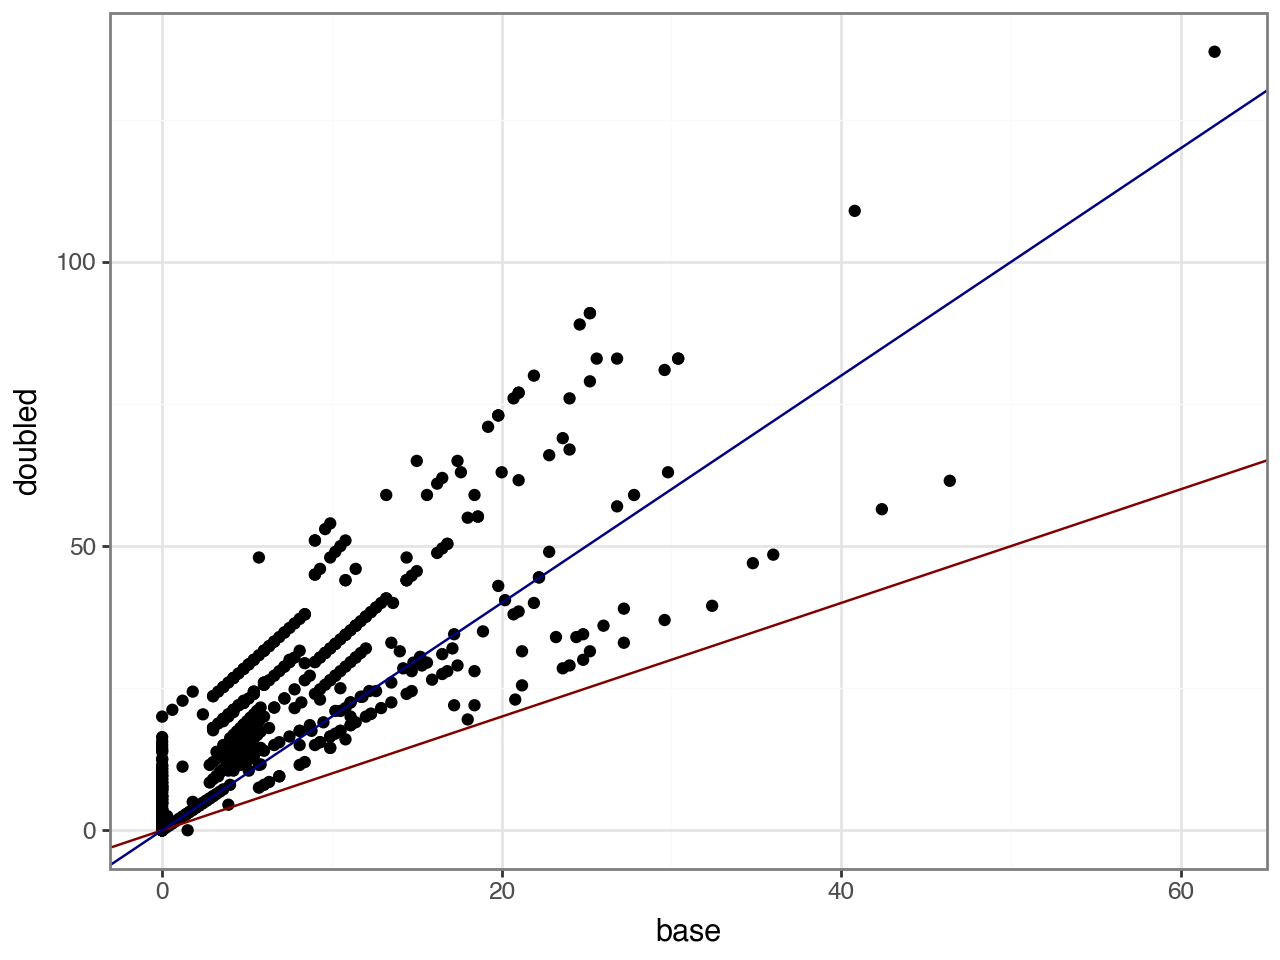

In [154]:
ts.plot_doublings(doublings_taxes_dat)

In [ ]:
# We're interested in finding subspaces where the outputs respond sublinearly to growth in the inputs.
# So can we... train a linear model, and compare it to the boosted model, and search for where the linear model
# is overpredicting the most? Some kind of ratio of booster preds and linear model preds... there is something there.

In [157]:
discounts_dat = (
    doublings_taxes_dat
    .query("doubled < base * 1.5")
    .assign(ratio=lambda d: d['doubled'] / d['base'])
    .sort_values('ratio'))

data.dat.merge(discounts_dat, left_index=True, right_on='j').sort_values('ratio')

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,Tax Assessed,total_tax,i,j,base,doubled,ratio
290,8,0,0,6,0,0 gp 0 sp,0.0,1538,10350,1.5,0.0,0.000000
497,6,0,6,6,6,19 gp 5 sp,19.5,8109,12461,18.0,19.5,1.083333
277,6,0,6,8,6,23 gp 0 sp,23.0,1389,15439,20.8,23.0,1.105769
51,4,0,0,6,0,4 gp 5 sp,4.5,158,9601,3.9,4.5,1.153846
468,4,2,0,6,14,22 gp 0 sp,22.0,6017,14966,18.4,22.0,1.195652
406,4,2,0,8,14,25 gp 5 sp,25.5,3641,37199,21.2,25.5,1.202830
478,4,2,4,8,0,28 gp 5 sp,28.5,6670,49825,23.6,28.5,1.207627
459,4,2,4,6,8,29 gp 0 sp,29.0,5622,50541,24.0,29.0,1.208333
380,4,4,0,6,2,30 gp 0 sp,30.0,2953,2831,24.8,30.0,1.209677
391,4,4,0,6,8,33 gp 0 sp,33.0,3200,11265,27.2,33.0,1.213235


In [ ]:
# Does hunting enough Unicorns give you a discount, even on your other items??
# Like, they're a menace, and overpopulated, so there's a reward for hunting them...
# or they're medicinal, and there's a shortage

/Users/localmaxima/venvs/stress-strain/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 234'. Pick better value with 'binwidth'.


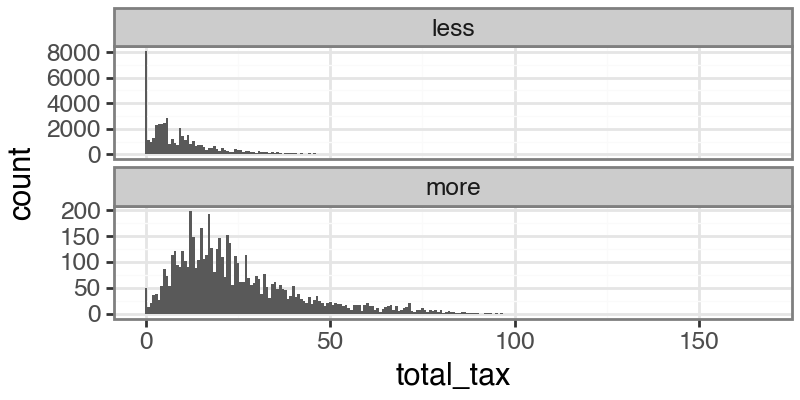

In [145]:
less_dat = data.dat[data.dat['Unicorn Horn'] < 5].assign(unicorns='less')
more_dat = data.dat[data.dat['Unicorn Horn'] >= 5].assign(unicorns='more')
unicorn_threshold_dat = pd.concat([less_dat, more_dat])
(
    pn.ggplot(unicorn_threshold_dat, pn.aes(x='total_tax')) +
    pn.geom_histogram() +
    pn.facet_wrap('unicorns', ncol=1, scales='free_y') +
    pn.theme_bw() +
    pn.theme(figure_size=(4, 2)))

In [108]:
item = 'Zombie Hand'
maximum = int(data.get_ranges().query(f"item == '{item}'")['max'].iloc[0])
maximum

29

In [158]:
do_dat = ts.apply_do_operator_over_ranges(data, modeler)

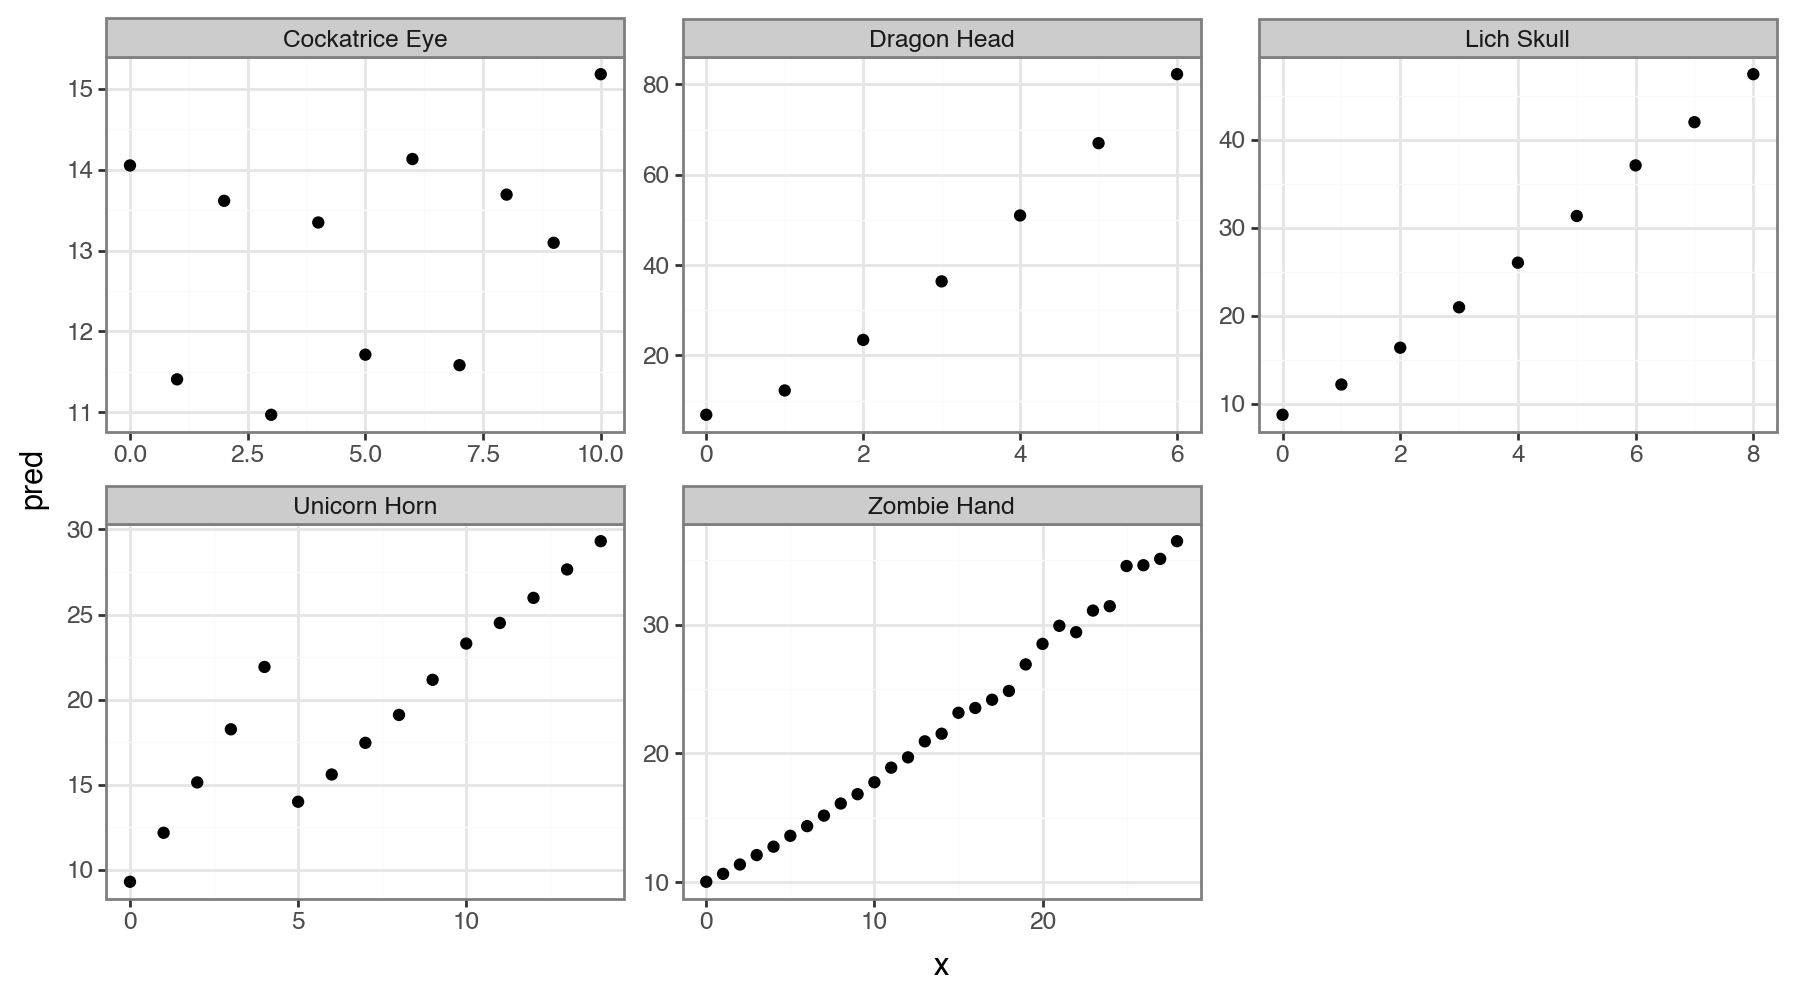

In [163]:
ts.get_do_results_plot(do_dat)

In [184]:
ts.ITEMS

['Cockatrice Eye', 'Dragon Head', 'Lich Skull', 'Unicorn Horn', 'Zombie Hand']

In [423]:
(
    d[(d['Cockatrice Eye'] == 3) & 
    (d['Dragon Head'] >= 3) & 
    (d['Lich Skull'] == 0) &
    (d['Unicorn Horn'] >= 5) &
    (d['Zombie Hand'] == 0)]).head(1)

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,Tax Assessed,total_tax
1091,3,3,0,7,0,22 gp 2 sp,22.2


In [21]:
zeros_dat = data.dat.query("total_tax == 0")
zeros_dat = zeros_dat[zeros_dat['Unicorn Horn'] == 0]
zeros_dat

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,Tax Assessed,total_tax
28,1,0,1,0,6,0 gp 0 sp,0.0
29,1,0,1,0,5,0 gp 0 sp,0.0
40,1,0,0,0,4,0 gp 0 sp,0.0
43,2,0,0,0,3,0 gp 0 sp,0.0
70,3,0,0,0,1,0 gp 0 sp,0.0
...,...,...,...,...,...,...,...
53961,1,1,0,0,2,0 gp 0 sp,0.0
53963,1,0,0,0,2,0 gp 0 sp,0.0
53992,1,0,1,0,3,0 gp 0 sp,0.0
53993,1,0,1,0,3,0 gp 0 sp,0.0


In [9]:
assessor = ts.AssignmentAssessor(data, modeler)

In [92]:
records = [
    [0, 0, 1, 0, 8],  # one
    [1, 1, 1, 1, 0],  # two
    [0, 0, 2, 0, 0],  # three
    [3, 3, 1, 6, 0]]  # four
assessor.assess(records)

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,Tax Assessed,total_tax,predicted,summed_actual,summed_predicted
0,0,0,1,0,8,2 gp 6 sp,2.6,2.7,32.7,32.6
18,1,1,1,1,0,5 gp 1 sp,5.1,4.9,32.7,32.6
96,0,0,2,0,0,2 gp 0 sp,2.0,2.0,32.7,32.6
291,3,3,1,6,0,23 gp 0 sp,23.0,23.0,32.7,32.6


In [103]:
records = [
    [0, 0, 2, 0, 8],  # one
    [1, 1, 1, 1, 0],  # two
    [1, 1, 1, 1, 0],  # three
    [2, 2, 1, 5, 0]]  # four
assessor.assess(records)

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,rowid,Tax Assessed,total_tax,predicted,summed_actual,summed_predicted
0,0,0,2,0,8,0,3 gp 6 sp,3.6,3.4,32.6,32.1
8,1,1,1,1,0,1,5 gp 1 sp,5.1,4.9,32.6,32.1
86,1,1,1,1,0,2,5 gp 1 sp,5.1,4.9,32.6,32.1
164,2,2,1,5,0,3,18 gp 8 sp,18.8,18.9,32.6,32.1


In [123]:
records = [
    [0, 0, 2, 0, 8],  # one
    [1, 1, 0, 1, 0],  # two
    [1, 1, 0, 1, 0],  # three
    [2, 2, 3, 5, 0]]  # four
assessor.assess(records)

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,rowid,Tax Assessed,total_tax,predicted,summed_actual,summed_predicted
0,0,0,2,0,8,0,3 gp 6 sp,3.6,3.4,27.4,27.4
8,1,1,0,1,0,1,0 gp 0 sp,0.0,0.3,27.4,27.4
133,1,1,0,1,0,2,0 gp 0 sp,0.0,0.3,27.4,27.4
258,2,2,3,5,0,3,23 gp 8 sp,23.8,23.4,27.4,27.4


In [136]:
records = [
    [0, 0, 2, 0, 8],  # one
    [1, 1, 0, 1, 0],  # two
    [0, 1, 0, 1, 0],  # three
    [3, 2, 3, 5, 0]]  # four
assessor.assess(records)

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,rowid,Tax Assessed,total_tax,predicted,summed_actual,summed_predicted
0,0,0,2,0,8,0,3 gp 6 sp,3.6,3.4,27.0,27.2
8,1,1,0,1,0,1,0 gp 0 sp,0.0,0.3,27.0,27.2
133,0,1,0,1,0,2,4 gp 2 sp,4.2,4.2,27.0,27.2
319,3,2,3,5,0,3,19 gp 2 sp,19.2,19.3,27.0,27.2


In [134]:
# simon's solution
records = [
    [1, 1, 0, 0, 4],  # one
    [1, 1, 0, 1, 1],  # two
    [1, 1, 0, 1, 1],  # three
    [1, 1, 5, 5, 2]]  # four
assessor.assess(records)

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,rowid,Tax Assessed,total_tax,predicted,summed_actual,summed_predicted
0,1,1,0,0,4,0,0 gp 0 sp,0.0,0.4,0.0,22.3
54,1,1,0,1,1,1,0 gp 0 sp,0.0,0.5,0.0,22.3
105,1,1,0,1,1,2,0 gp 0 sp,0.0,0.5,0.0,22.3
156,1,1,5,5,2,3,NaN,NaN,20.9,0.0,22.3


In [15]:
records = [
    [1, 0, 1, 0, 6],  # one
    [0, 0, 2, 0, 0],  # two
    [0, 0, 2, 0, 2],  # three
    [3, 4, 0, 7, 0]]  # four
assessor.assess(records)

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,Tax Assessed,total_tax,predicted,summed_actual,summed_predicted
0,1,0,1,0,6,0 gp 0 sp,0.0,0.61,4.4,34.49
41,0,0,2,0,0,2 gp 0 sp,2.0,2.01,4.4,34.49
236,0,0,2,0,2,2 gp 4 sp,2.4,2.53,4.4,34.49
294,3,4,0,7,0,NaN,NaN,29.34,4.4,34.49


In [16]:

records = [
    [0, 0, 1, 0, 6],  # one
    [1, 0, 2, 2, 0],  # two
    [0, 0, 2, 0, 2],  # three
    [3, 4, 0, 5, 0]]  # four
assessor.assess(records)

,Cockatrice Eye,Dragon Head,Lich Skull,Unicorn Horn,Zombie Hand,Tax Assessed,total_tax,predicted,summed_actual,summed_predicted
0,0,0,1,0,6,2 gp 2 sp,2.2,2.23,36.4,34.86
68,1,0,2,2,0,6 gp 0 sp,6.0,5.85,36.4,34.86
146,0,0,2,0,2,2 gp 4 sp,2.4,2.53,36.4,34.86
204,3,4,0,5,0,25 gp 8 sp,25.8,24.25,36.4,34.86


In [424]:


# records = [
#     [1, 0, 1, 0, 6],  # one
#     [0, 0, 2, 2, 0],  # two
#     [0, 0, 2, 0, 2],  # three
#     [3, 4, 0, 5, 0]]  # four



single_dat = pd.DataFrame(records)
single_dat.columns = ts.ITEMS
taxes = modeler.model.predict(single_dat)
print(f"{taxes} = {sum(taxes):.2f}")

[ 1.12166233  2.01379489  2.53606322 28.95979647] = 34.63


In [126]:
do_dat.query("item == 'Dragon Head'")

,item,x,pred
11,Dragon Head,0,6.864546
12,Dragon Head,1,12.249766
13,Dragon Head,2,23.444264
14,Dragon Head,3,36.397404
15,Dragon Head,4,50.996669
16,Dragon Head,5,67.005247
17,Dragon Head,6,82.277666


In [125]:
do_dat.query("item == 'Unicorn Horn'")

,item,x,pred
27,Unicorn Horn,0,9.304289
28,Unicorn Horn,1,12.182154
29,Unicorn Horn,2,15.141380
30,Unicorn Horn,3,18.260506
31,Unicorn Horn,4,21.923705
32,Unicorn Horn,5,14.005129
33,Unicorn Horn,6,15.605575
34,Unicorn Horn,7,17.466159
35,Unicorn Horn,8,19.104466
36,Unicorn Horn,9,21.168488
